<a href="https://colab.research.google.com/github/Mihauk/Anamoly-Detection/blob/main/Anamoly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [17]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Reading data

In [3]:
data = pd.read_csv("transaction_anomalies_dataset.csv")
print(data.head())

  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [7]:
data.shape

(1000, 12)

In [6]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


In [8]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


# Distribution of Transaction Amount

In [11]:
fig_amount = px.histogram(data, x='Transaction_Amount',
                          nbins=20,
                          title='Distribution of Transaction Amount')
fig_amount.show()

# Transaction Amount by Account Type

In [12]:
fig_box_amount = px.box(data,
                        x='Account_Type',
                        y='Transaction_Amount',
                        title='Transaction Amount by Account Type')
fig_box_amount.show()

# Average Transaction Amount vs. Age

In [13]:
fig_scatter_avg_amount_age = px.scatter(data, x='Age',
                                        y='Average_Transaction_Amount',
                                        color='Account_Type',
                                        title='Average Transaction Amount vs. Age',
                                        trendline='ols')
fig_scatter_avg_amount_age.show()

# Count of Transactions by Day of the Week

In [14]:
fig_day_of_week = px.bar(data, x='Day_of_Week',
                         title='Count of Transactions by Day of the Week')
fig_day_of_week.show()

# Correlation Heatmap

In [16]:
correlation_matrix = data.corr(numeric_only=True)
fig_corr_heatmap = px.imshow(correlation_matrix,
                             title='Correlation Heatmap')
fig_corr_heatmap.show()

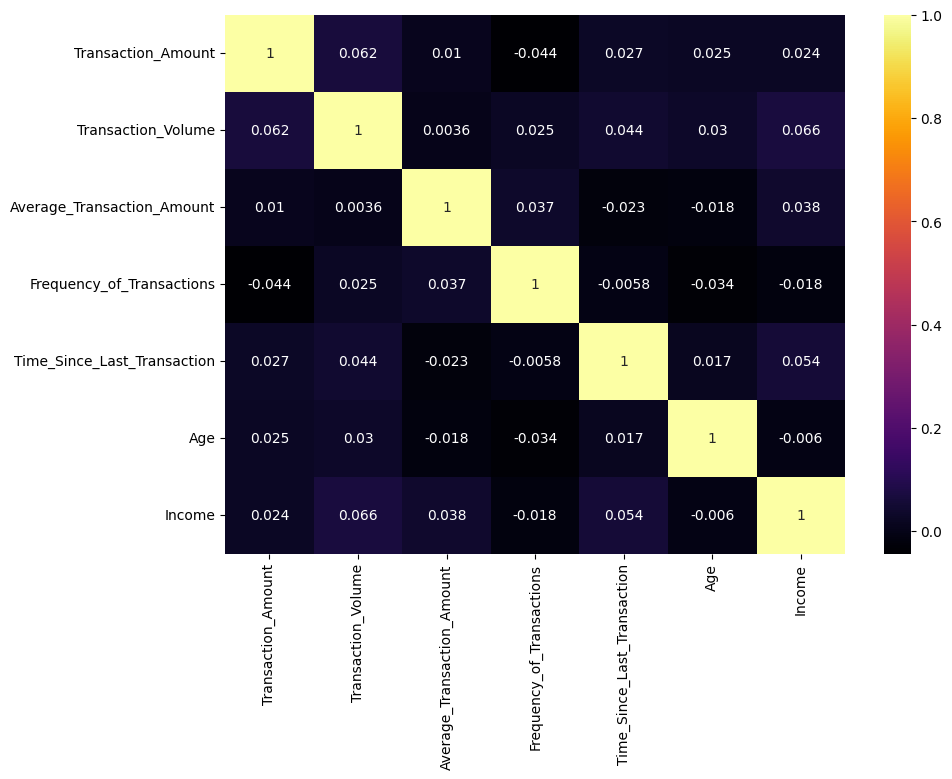

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='inferno');

# Calculate mean and standard deviation of Transaction Amount


In [20]:
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()


# Define the anomaly threshold (2 standard deviations from the mean)

In [21]:
anomaly_threshold = mean_amount + 2 * std_amount


## Flag anomalies

In [22]:
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

In [23]:
fig_anomalies = px.scatter(data, x='Transaction_Amount', y='Average_Transaction_Amount',
                           color='Is_Anomaly', title='Anomalies in Transaction Amount')
fig_anomalies.update_traces(marker=dict(size=12),
                            selector=dict(mode='markers', marker_size=1))
fig_anomalies.show()

In [25]:
# Calculate the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances in the dataset
total_instances = data.shape[0]

# Calculate the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


# Machine Learning Model

In [26]:
relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target variable (y)
X = data[relevant_features]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.02, random_state=42)

In [27]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [28]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount': 3000
Enter the value for 'Average_Transaction_Amount': 1000
Enter the value for 'Frequency_of_Transactions': 4
Anomaly detected: This transaction is flagged as an anomaly.
